# Experimental Design in Python

## Experimental Design Preliminaries

### Setting up experiments

#### Non-random assignment of subjects
An agricultural firm is conducting an experiment to measure how feeding sheep different types of grass affects their weight. They have asked for your help to properly set up the experiment. One of their managers has said you can perform the subject assignment by taking the top 250 rows from the DataFrame and that should be fine.

Your task is to use your analytical skills to demonstrate why this might not be a good idea. Assign the subjects to two groups using non-random assignment (the first 250 rows) and observe the differences in descriptive statistics.

You have received the DataFrame, weights which has a column containing the weight of the sheep and a unique id column.

numpy and pandas have been imported as np and pd, respectively.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_chick_weights = pd.read_csv(r'.\data\chick_weight.csv')
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [3]:
# Non-random assignment
group1_non_rand = df_chick_weights.loc[:289,['weight']]
group2_non_rand = df_chick_weights.loc[289:,['weight']]

# Compare descriptive statistics of groups
compare_df_non_rand = \
    pd.concat(
        [group1_non_rand['weight'].describe(),
        group2_non_rand['weight'].describe()],
        axis=1
    )
compare_df_non_rand.columns = ['group1', 'group2']

# Print to assess
print(compare_df_non_rand)

           group1      group2
count  290.000000  289.000000
mean   106.831034  137.145329
std     61.521165   76.707912
min     35.000000   39.000000
25%     59.000000   69.000000
50%     89.000000  126.000000
75%    141.750000  186.000000
max    331.000000  373.000000


#### Random assignment of subjects
Having built trust from your last work with the agricultural firm, you have been given the task of properly setting up the experiment.

Use your knowledge of best practice experimental design set up to assign the sheep to two even groups of 250 each.

In [4]:
# Randomly assign half
group1_random = df_chick_weights.sample(
    frac=0.5,
    random_state=42,
    replace=False
)

# Create second assignment
group2_random = df_chick_weights.drop(
    group1_random.index
)

# Compare assignments
compare_df_random = pd.concat(
    [group1_random['weight'].describe(),
    group2_random['weight'].describe()],
    axis=1
)
compare_df_random.columns = ['group1', 'group2']
print(compare_df_random)

           group1      group2
count  289.000000  289.000000
mean   120.044983  123.591696
std     70.089685   72.118725
min     35.000000   39.000000
25%     62.000000   63.000000
50%    105.000000  103.000000
75%    163.000000  164.000000
max    373.000000  361.000000


### Experimental data setup

#### Test

In [5]:
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


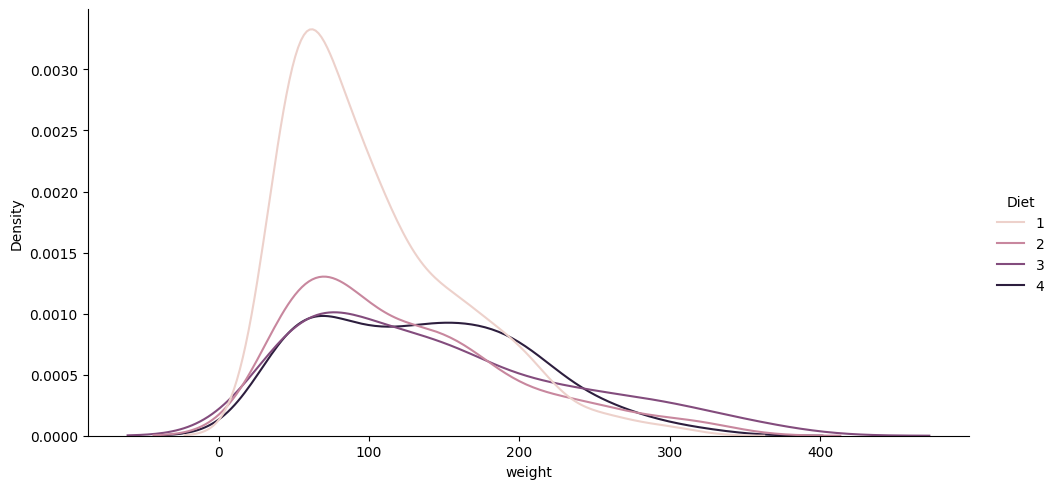

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.displot(  data=df_chick_weights,
              x='weight',
              hue='Diet',
              kind='kde',
              aspect=2
          )
plt.show();

#### Blocking experimental data

You are working with a manufacturing firm that wants to conduct some experiments on worker productivity. Their dataset only contains 100 rows, so it's important that experimental groups are balanced.

This sounds like a great opportunity to use your knowledge of blocking to assist them. They have provided a productivity_subjects DataFrame. Split the provided dataset into two even groups of 50 entries each.

In [7]:
df_athletic_perf = pd.read_csv(r'.\data\athletic_perf.csv')
productivity_subjects=df_athletic_perf[['Athlete_ID']]
productivity_subjects.shape

(300, 1)

In [8]:
# Randomly assign half
block_1 = productivity_subjects.sample(
    frac=0.5,
    random_state=42,
    replace=False)

# Set the block column
block_1['block'] = 1

# Create second assignment and label
block_2 = productivity_subjects.drop(
    block_1.index
)
block_2['block'] = 2

# Concatenate and print
productivity_combined = pd.concat(
    [block_1, block_2], axis=0)
print(productivity_combined['block'].value_counts())

block
1    150
2    150
Name: count, dtype: int64


### Stratifying an experiment

You are working with a government organization that wants to undertake an experiment around how some particular government policies impact the net wealth of individuals in a number of areas.

They have approached you to help set up the experimental design. They have warned you that there is likely to be a small group of users who already have high net wealth and are concerned that this group might overshadow any experimental outcome observed. You know just what to do!

Use your knowledge of experimental design to undertake block randomization, stratifying by the high_wealth column in the provided wealth_data DataFrame. There are 2000 rows in the DataFrame with 200 high net wealth subjects (high_wealth is 1).

In [9]:
df_athletic_perf['Training_Program'].unique()

array(['Strength', 'HIIT', 'Endurance'], dtype=object)

In [10]:
df_athletic_perf.head()

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc
0,1,Strength,Keto,Low,8.749524
1,2,HIIT,Plant-Based,High,9.452781
2,3,Strength,Plant-Based,Low,13.928506
3,4,Strength,Plant-Based,High,9.605557
4,5,HIIT,Plant-Based,Low,7.547894


In [11]:
# Create the first block
strata_1 = df_athletic_perf[df_athletic_perf['Initial_Fitness'] == 'High']
strata_1['Block'] = 1

# Create two groups assigning to Treatment or Control
strata_1_g1 = strata_1.sample(frac=0.5, replace=False)
strata_1_g1['T_C'] = 'T'
strata_1_g2 = strata_1.drop(strata_1_g1.index)
strata_1_g2['T_C'] = 'C'

# Create the second block and assign groups
strata_2 = df_athletic_perf[df_athletic_perf['Initial_Fitness'] == 'Low']
strata_2['Block'] = 2

strata_2_g1 = strata_2.sample(frac=0.5, replace=False)
strata_2_g1['T_C'] = 'T'
strata_2_g2 = strata_2.drop(strata_2_g1.index)
strata_2_g2['T_C'] = 'C'

# Concatenate the grouping work
df_athletic_perf_stratified = pd.concat([strata_1_g1, strata_1_g2, strata_2_g1, strata_2_g2])
df_athletic_perf_stratified.head()
print(df_athletic_perf_stratified.groupby(['Block','T_C', 'Initial_Fitness']).size())

Block  T_C  Initial_Fitness
1      C    High               44
       T    High               44
2      C    Low                57
       T    Low                56
dtype: int64


### Normal data

#### Normal

In [12]:
df_athletic_perf.head(3)

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc
0,1,Strength,Keto,Low,8.749524
1,2,HIIT,Plant-Based,High,9.452781
2,3,Strength,Plant-Based,Low,13.928506


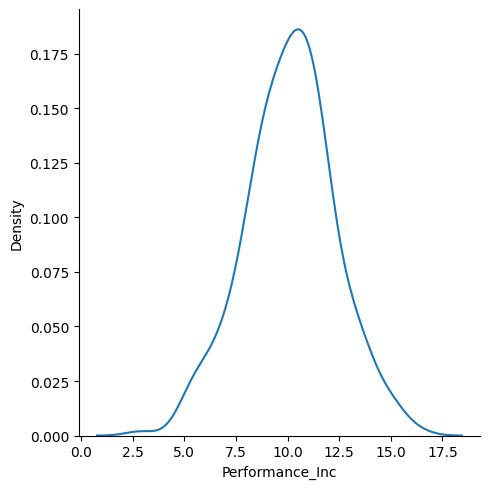

In [13]:
sns.displot(
    data=df_athletic_perf,
    x='Performance_Inc',
    kind='kde'
)
plt.show();

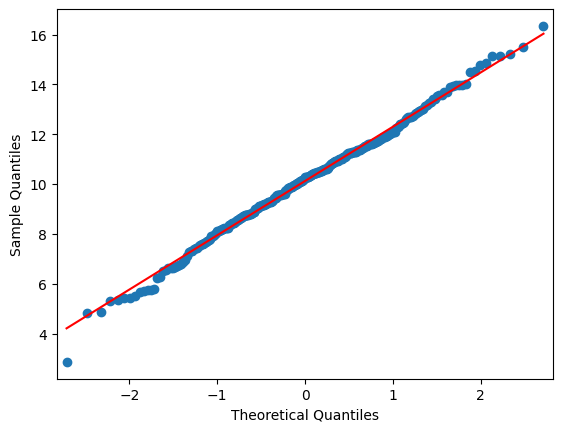

In [14]:
import statsmodels.graphics.gofplots as smgg
import scipy.stats.distributions as ssd

smgg.qqplot(
    df_athletic_perf['Performance_Inc'],
    line='s',
    dist=ssd.norm
)
plt.show();

#### Shapiro-Wilk Test

In [15]:
import scipy.stats as spst
alpha = 0.05
stat, p = spst.shapiro(df_athletic_perf['Performance_Inc'])
print(f'p: {round(p,4)}; test stat: {round(stat, 4)}')

p: 0.6787; test stat: 0.9961


#### Anderson-Darling Test

In [16]:
result = spst.anderson(x=df_athletic_perf['Performance_Inc'], dist='norm')
print(f'result: {round(result.statistic, 4)}\nSignificance: {result.significance_level}\nCritical: {result.critical_values}')

result: 0.3754
Significance: [15.  10.   5.   2.5  1. ]
Critical: [0.569 0.648 0.777 0.906 1.078]


#### Visual normality in an agricultural experiment

You have been contracted by an agricultural firm conducting an experiment on 50 chickens, divided into four groups, each fed a different diet. Weight measurements were taken every second day for 20 days.

You'll analyze chicken_data to assess normality, which will determine the suitability of parametric statistical tests, beginning with a visual examination of the data distribution.

In [17]:
import seaborn as sns
import pandas as pd
import statsmodels.graphics.gofplots as smgg

In [18]:
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


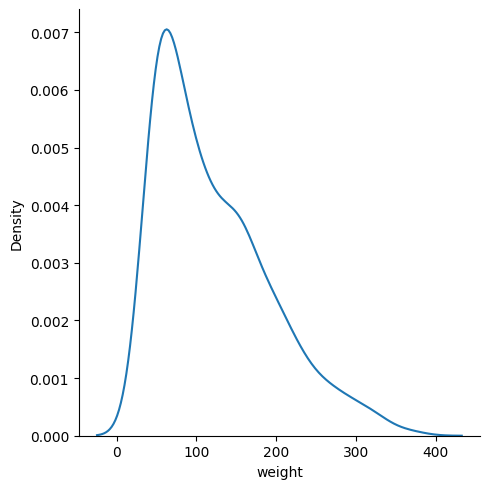

In [19]:
# Plot the distribution of the chickens' weight
sns.displot(data=df_chick_weights, x='weight', kind='kde')
plt.show()

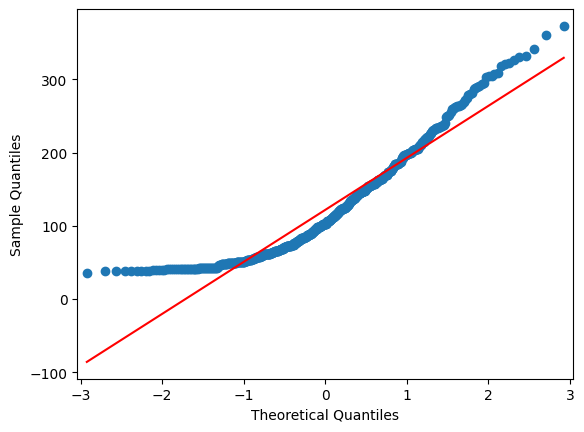

In [20]:
smgg.qqplot(
    df_chick_weights['weight'],
    line='s',
    dist=ssd.norm
)
plt.show();

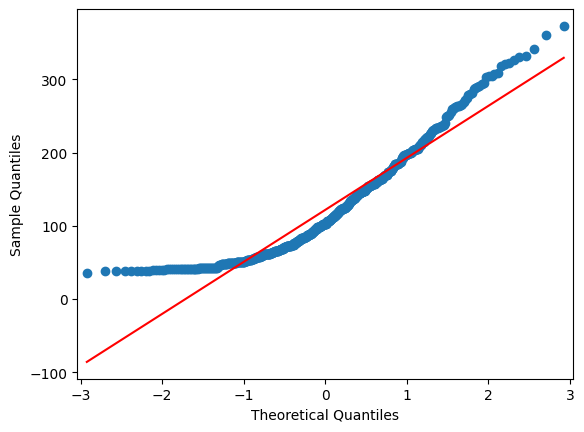

In [21]:
smgg.qqplot(
    df_chick_weights['weight'],
    line='s'
)
plt.show();

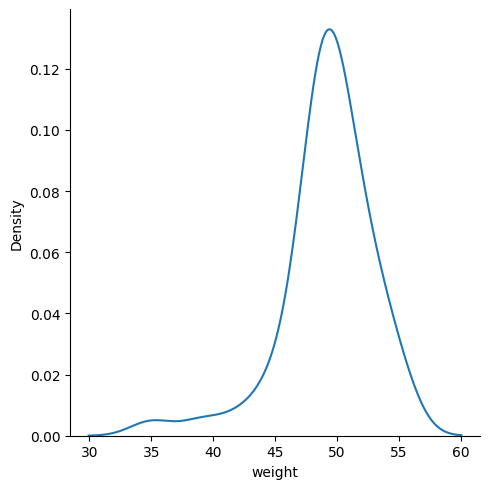

In [22]:
# Subset the data
subset_data = df_chick_weights[df_chick_weights['Time'] == 2]

# Repeat the plotting
sns.displot(data=subset_data, x='weight', kind="kde")
plt.show();

#### Analytical normality in an agricultural experiment

In [23]:
# Shapiro-Wilk Test
alpha = 0.05
stat, p = spst.shapiro(df_chick_weights['weight'])
print(f'p: {round(p,4)}; test stat: {round(stat, 4)}')

p: 0.0; test stat: 0.9087


In [24]:
# Anderson-Darling Test
result = spst.anderson(x=df_chick_weights['weight'], dist='norm')
print(f'result: {round(result.statistic, 4)}\nSignificance: {result.significance_level}\nCritical: {result.critical_values}')

result: 14.6868
Significance: [15.  10.   5.   2.5  1. ]
Critical: [0.572 0.652 0.782 0.912 1.085]


## Factorial designs: principles and applications

### Covariate adjustment in experimental design

<b>Covariates:</b> Variables in datasets that affect experiment results but are not primary focus

<li> Importance in reducing confounding
<li> Impact on precision and validity of results
<br>

<b>Covariate adjustment with chick growth</b><br>
Imagine studying in agricultural science the growth patterns of chicks under various dietary regimens. The data from this study sheds light on the intricate relationship between their respective diets and the consequent impact on their weight. This data includes weight measurements of chicks at different ages, allowing for an exploration of covariate adjustment. age serves as a covariate, potentially influencing the outcome variable: the weight of the chicks.

DataFrames exp_chick_data, the experimental data, and cov_chick_data, the covariate data, have been loaded, along with the following libraries:



In [31]:
import pandas as pd
import numpy as np
import statsmodels as sm #.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df_chick_weights.shape

(578, 4)

In [25]:
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [28]:
exp_chick_data = df_chick_weights[['Chick', 'weight', 'Diet']]
cov_chick_data = df_chick_weights[['Chick', 'Time']]

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     140.9
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           1.12e-60
Time:                        11:16:47   Log-Likelihood:                -38608.
No. Observations:                6818   AIC:                         7.722e+04
Df Residuals:                    6815   BIC:                         7.724e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.0678      2.275     41.342      0.0

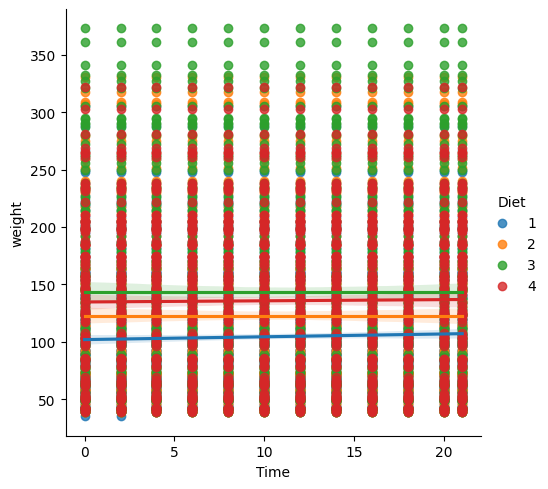

In [32]:
# Join experimental and covariate data
merged_chick_data = \
    pd.merge(
        exp_chick_data,
        cov_chick_data,
        on='Chick'
    )

# Perform ANCOVA with Diet and Time as predictors
model = \
    sm.formula.api.ols(
        'weight ~ Diet + Time',
        data=merged_chick_data
    ).fit()

# Print a summary of the model
print(model.summary())

# Visualize Diet effects with Time adjustment
sns.lmplot(
    x='Time',
    y='weight',
    hue='Diet',
    data=merged_chick_data)
plt.show()

You've successfully merged the experimental and covariate data to create a comprehensive dataset, then adeptly performed an ANCOVA, incorporating both 'Diet' and 'Time' as predictors. The visualization further clarifies how diet influences weight over time. It looks like 'Time' might not be as meaningful since the lines are all close to parallel, and the large p-value in the summary also corresponds to the 'Time' coefficient!

## Analyzing Experimental Data: Statistical Tests and Power

### Choosing the right statistical test